<a href="https://colab.research.google.com/github/Saeed-upm/Selected-Topics-in-Financial-Mathematics/blob/main/Selected_Topics_in_Financial_math_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# رگرسیون چند متغیره
***

***
## فرضیات مدل

It's essential to understand the assumptions of the model before we start building and coding. Each assumption if violated means we may have to take extra steps to improve our model or in some cases dump the model altogether. Here is a list of the assumptions of the model:

- Regression residuals must be normally distributed.
- A linear relationship is assumed between the dependent variable and the independent variables.
- The residuals are homoscedastic and approximately rectangular-shaped.
- Absence of multicollinearity is expected in the model, meaning that independent variables are not too highly correlated.
- No Autocorrelation of the residuals.

I will be explaining these assumptions in more detail as we arrive at each of them in the tutorial. At this point, however, we need to have an idea of what they are.

***
## Section One: Import our Libraries
The first thing we need to do is import the libraries we will be using in this tutorial. To visualize our data, we will be using `matplotlib` and `seaborn` to create heatmaps and a scatter matrix. To build our model, we will be using the `sklearn` library, and the evaluation will be taking place with the `statsmodels` library. I've also added a few additional modules to help calculate certain metrics.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.stats import diagnostic as diag
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

%matplotlib inline

## Section Two: Load the Data into Pandas
After we've loaded our libraries, we can begin the process of importing and exploring our data. I've created an excel file with all the data we will be using in this tutorial. It contains 10 explanatory variables and 1 dependent variable. After we've loaded the data into the data frame, we will need to replace all the `..` values with `nan` as these represent missing values in our dataset.

This dataset was downloaded from the World Bank website; if you would like to visit the site yourself, I encourage you to visit the link provided below. There is a tremendous amount of data available for free, that can be used across a wide range of models.

Link: https://data.worldbank.org/

From here, we will set the index of our data frame using the `set_index()` function to the `Year` column. The reasoning behind this is because it will make selecting the data easier. After we've defined the index, we convert the entire data frame to a `float` data type and then select years `1969 to 2016`. **These years were selected because they do not contain any missing values.**

To make selecting the columns a little easier, we will rename all of our columns. I'll create a dictionary where the keys represent the old column names and the values associated with those keys are the new column names. I'll then call the `rename()` method and pass through the new columns dictionary.

Finally, I'll check one last time for any missing values using `isnull().any()`, which will return true for a given column if any values are missing, and then print the head of the data frame.

In [2]:
# load the data and replace the '..' with nan
from google.colab import drive
drive.mount('/content/drive')
path='/content/drive/My Drive/Colab Notebooks/korea_data.xlsx'
econ_df = pd.read_excel(path)
econ_df = econ_df.replace('..','nan')
econ_df = econ_df.set_index('Year')
# set the data type and select rows up to 2016
econ_df = econ_df.astype(float)
econ_df = econ_df.loc['1969':'2016']
econ_df
column_names = {'Unemployment, total (% of total labor force) (national estimate)':'unemployment',
                'GDP growth (annual %)': 'gdp_growth',
                'Gross capital formation (% of GDP)':'gross_capital_formation',
                'Population growth (annual %)':'pop_growth',
                'Birth rate, crude (per 1,000 people)':'birth_rate',
               'Broad money growth (annual %)':'broad_money_growth',
               'Final consumption expenditure (% of GDP)':'final_consum_gdp',
                'Final consumption expenditure (annual % growth)':'final_consum_growth',
                'General government final consumption expenditure (annual % growth)':'gov_final_consum_growth',
                'Gross capital formation (annual % growth)':'gross_cap_form_growth',
                'Households and NPISHs Final consumption expenditure (annual % growth)':'hh_consum_growth'}

# rename columns
econ_df = econ_df.rename(columns = column_names)

# check for nulls
display('-'*100)
display(econ_df.isnull().any())

# display the first five rows
display('-'*100)
display(econ_df.head())

Mounted at /content/drive


'----------------------------------------------------------------------------------------------------'

gdp_growth                 False
gross_capital_formation    False
pop_growth                 False
birth_rate                 False
broad_money_growth         False
final_consum_growth        False
gov_final_consum_growth    False
gross_cap_form_growth      False
hh_consum_growth           False
unemployment               False
dtype: bool

'----------------------------------------------------------------------------------------------------'

,gdp_growth,gross_capital_formation,pop_growth,birth_rate,broad_money_growth,final_consum_growth,gov_final_consum_growth,gross_cap_form_growth,hh_consum_growth,unemployment
Year,,,,,,,,,,
1969,14.541235,29.943577,2.263434,30.663,60.984733,10.693249,10.640799,29.908118,10.700325,4.86
1970,9.997407,26.338200,2.184174,31.200,27.422864,10.161539,7.279573,0.058667,10.557300,4.51
1971,10.454693,25.558501,1.971324,31.200,20.844481,9.330434,8.610547,15.172870,9.426969,4.57
1972,7.150715,21.404761,1.875999,28.400,33.815028,5.788458,8.134824,-13.056701,5.471355,4.59
1973,14.827554,25.872858,1.768293,28.300,36.415629,8.089952,2.287729,32.098276,8.927295,4.04


##  همخطی چندگانه


,gdp_growth,gross_capital_formation,pop_growth,birth_rate,broad_money_growth,final_consum_growth,gov_final_consum_growth,gross_cap_form_growth,hh_consum_growth,unemployment
gdp_growth,1.000000,0.086712,0.567216,0.553225,0.335249,0.855835,0.098183,0.825496,0.868848,-0.160783
gross_capital_formation,0.086712,1.000000,-0.215243,-0.241668,-0.163803,0.266617,0.118075,0.187885,0.268592,-0.618524
pop_growth,0.567216,-0.215243,1.000000,0.978754,0.548336,0.470449,0.357042,0.317556,0.442187,0.279486
birth_rate,0.553225,-0.241668,0.978754,1.000000,0.530563,0.458319,0.370517,0.305254,0.428266,0.313783
broad_money_growth,0.335249,-0.163803,0.548336,0.530563,1.000000,0.290507,0.287270,0.235561,0.267220,0.336335
final_consum_growth,0.855835,0.266617,0.470449,0.458319,0.290507,1.000000,0.323250,0.700392,0.993526,-0.299310
gov_final_consum_growth,0.098183,0.118075,0.357042,0.370517,0.287270,0.323250,1.000000,0.033376,0.216641,0.007940
gross_cap_form_growth,0.825496,0.187885,0.317556,0.305254,0.235561,0.700392,0.033376,1.000000,0.715021,-0.207261
hh_consum_growth,0.868848,0.268592,0.442187,0.428266,0.267220,0.993526,0.216641,0.715021,1.000000,-0.304797
unemployment,-0.160783,-0.618524,0.279486,0.313783,0.336335,-0.299310,0.007940,-0.207261,-0.304797,1.000000


<Axes: >

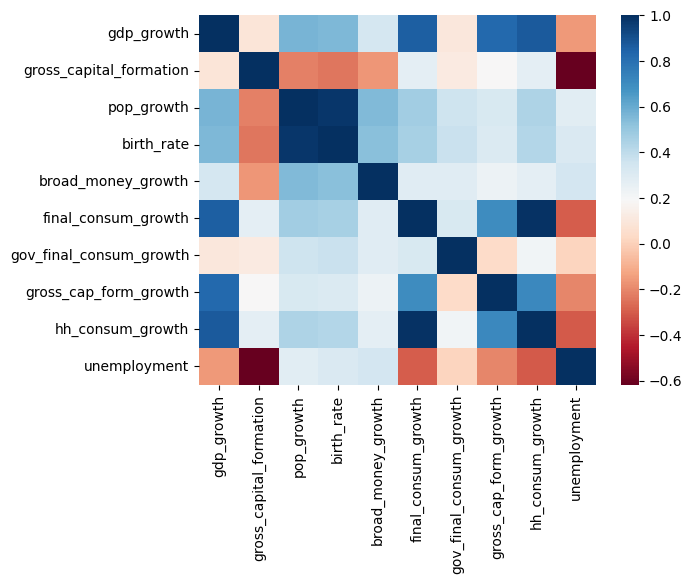

In [3]:
# calculate the correlation matrix
corr = econ_df.corr()

# display the correlation matrix
display(corr)

# plot the correlation heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='RdBu')

***
Looking at the heatmap along with the correlation matrix we can identify a few highly correlated variables. For example, if you look at the correlation between `birth_rate` and `pop_growth` it ends up at almost .98. This is an extremely high correlation and marks it as a candidate to be removed. Logically it makes sense that these two are highly correlated; if you're having more babies, then the population should be increasing.

However, we should be more systematic in our approach to removing highly correlated variables. One method we can use is the `variance_inflation_factor` which **is a measure of how much a particular variable is contributing to the standard error in the regression model. When significant multicollinearity exists, the variance inflation factor will be huge for the variables in the calculation.**

A general recommendation is that if any of our variables come back with a **value of 5 or higher, then they should be removed from the model.** I decided to show you how the VFI comes out before we drop the highly correlated variables and after we remove the highly correlated variables. Going forward in the tutorial we will only be using the `econ_df_after` data frame.

In [5]:
# define two data frames one before the drop and one after the drop
econ_df_before = econ_df
econ_df_after = econ_df.drop(['gdp_growth','birth_rate', 'final_consum_growth','gross_capital_formation'], axis = 1)

# the VFI does expect a constant term in the data, so we need to add one using the add_constant method
X1 = sm.tools.add_constant(econ_df_before)
X2 = sm.tools.add_constant(econ_df_after)

# create the series for both
series_before = pd.Series([variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])], index=X1.columns)
series_after = pd.Series([variance_inflation_factor(X2.values, i) for i in range(X2.shape[1])], index=X2.columns)

# display the series
print('DATA BEFORE')
print('-'*100)
display(series_before)

print('DATA AFTER')
print('-'*100)
display(series_after)

DATA BEFORE
----------------------------------------------------------------------------------------------------


const                       314.550195
gdp_growth                    9.807879
gross_capital_formation       2.430057
pop_growth                   25.759263
birth_rate                   26.174368
broad_money_growth            1.633079
final_consum_growth        2305.724583
gov_final_consum_growth      32.527332
gross_cap_form_growth         3.796420
hh_consum_growth           2129.093634
unemployment                  2.800008
dtype: float64

DATA AFTER
----------------------------------------------------------------------------------------------------


const                      27.891150
pop_growth                  1.971299
broad_money_growth          1.604644
gov_final_consum_growth     1.232229
gross_cap_form_growth       2.142992
hh_consum_growth            2.782698
unemployment                1.588410
dtype: float64

In [ ]:
X1.shape[1]

11

In [ ]:
X2

,const,pop_growth,broad_money_growth,gov_final_consum_growth,gross_cap_form_growth,hh_consum_growth,unemployment
Year,,,,,,,
1969,1.0,2.263434,60.984733,10.640799,29.908118,10.700325,4.8600
1970,1.0,2.184174,27.422864,7.279573,0.058667,10.557300,4.5100
1971,1.0,1.971324,20.844481,8.610547,15.172870,9.426969,4.5700
1972,1.0,1.875999,33.815028,8.134824,-13.056701,5.471355,4.5900
1973,1.0,1.768293,36.415629,2.287729,32.098276,8.927295,4.0400
1974,1.0,1.712705,24.036652,7.288576,31.493083,7.328337,4.1500
1975,1.0,1.682000,28.231630,6.960465,-1.493720,5.539527,4.1800
1976,1.0,1.596559,33.484656,0.560957,23.006080,8.254930,3.8076
1977,1.0,1.559039,39.705763,7.468013,31.486450,5.401645,3.8057


Looking at the data above we now get some confirmation about our suspicion. It makes sense to remove either `birth_rate` or `pop_growth` and some of the consumption growth metrics. Once we remove those metrics and recalculate the VFI, we get a passing grade and can move forward.

***
I also want to demonstrate another way to visualize our data to check for multicollinearity. Inside of `pandas`, there is a `scatter_matrix` chart that will create a scatter plot for each variable in our dataset against another variable. This is a great tool for visualizing the correlation of one variable across all the other variables in the dataset. I'll take my econ_df_after and pass it through the `scatter_matrix` method. What you're looking for is a more random distribution, there shouldn't be any strong trends in the scatter matrix as this would be identifying correlated variables. Now, for our explanatory variable, we want to see trends!

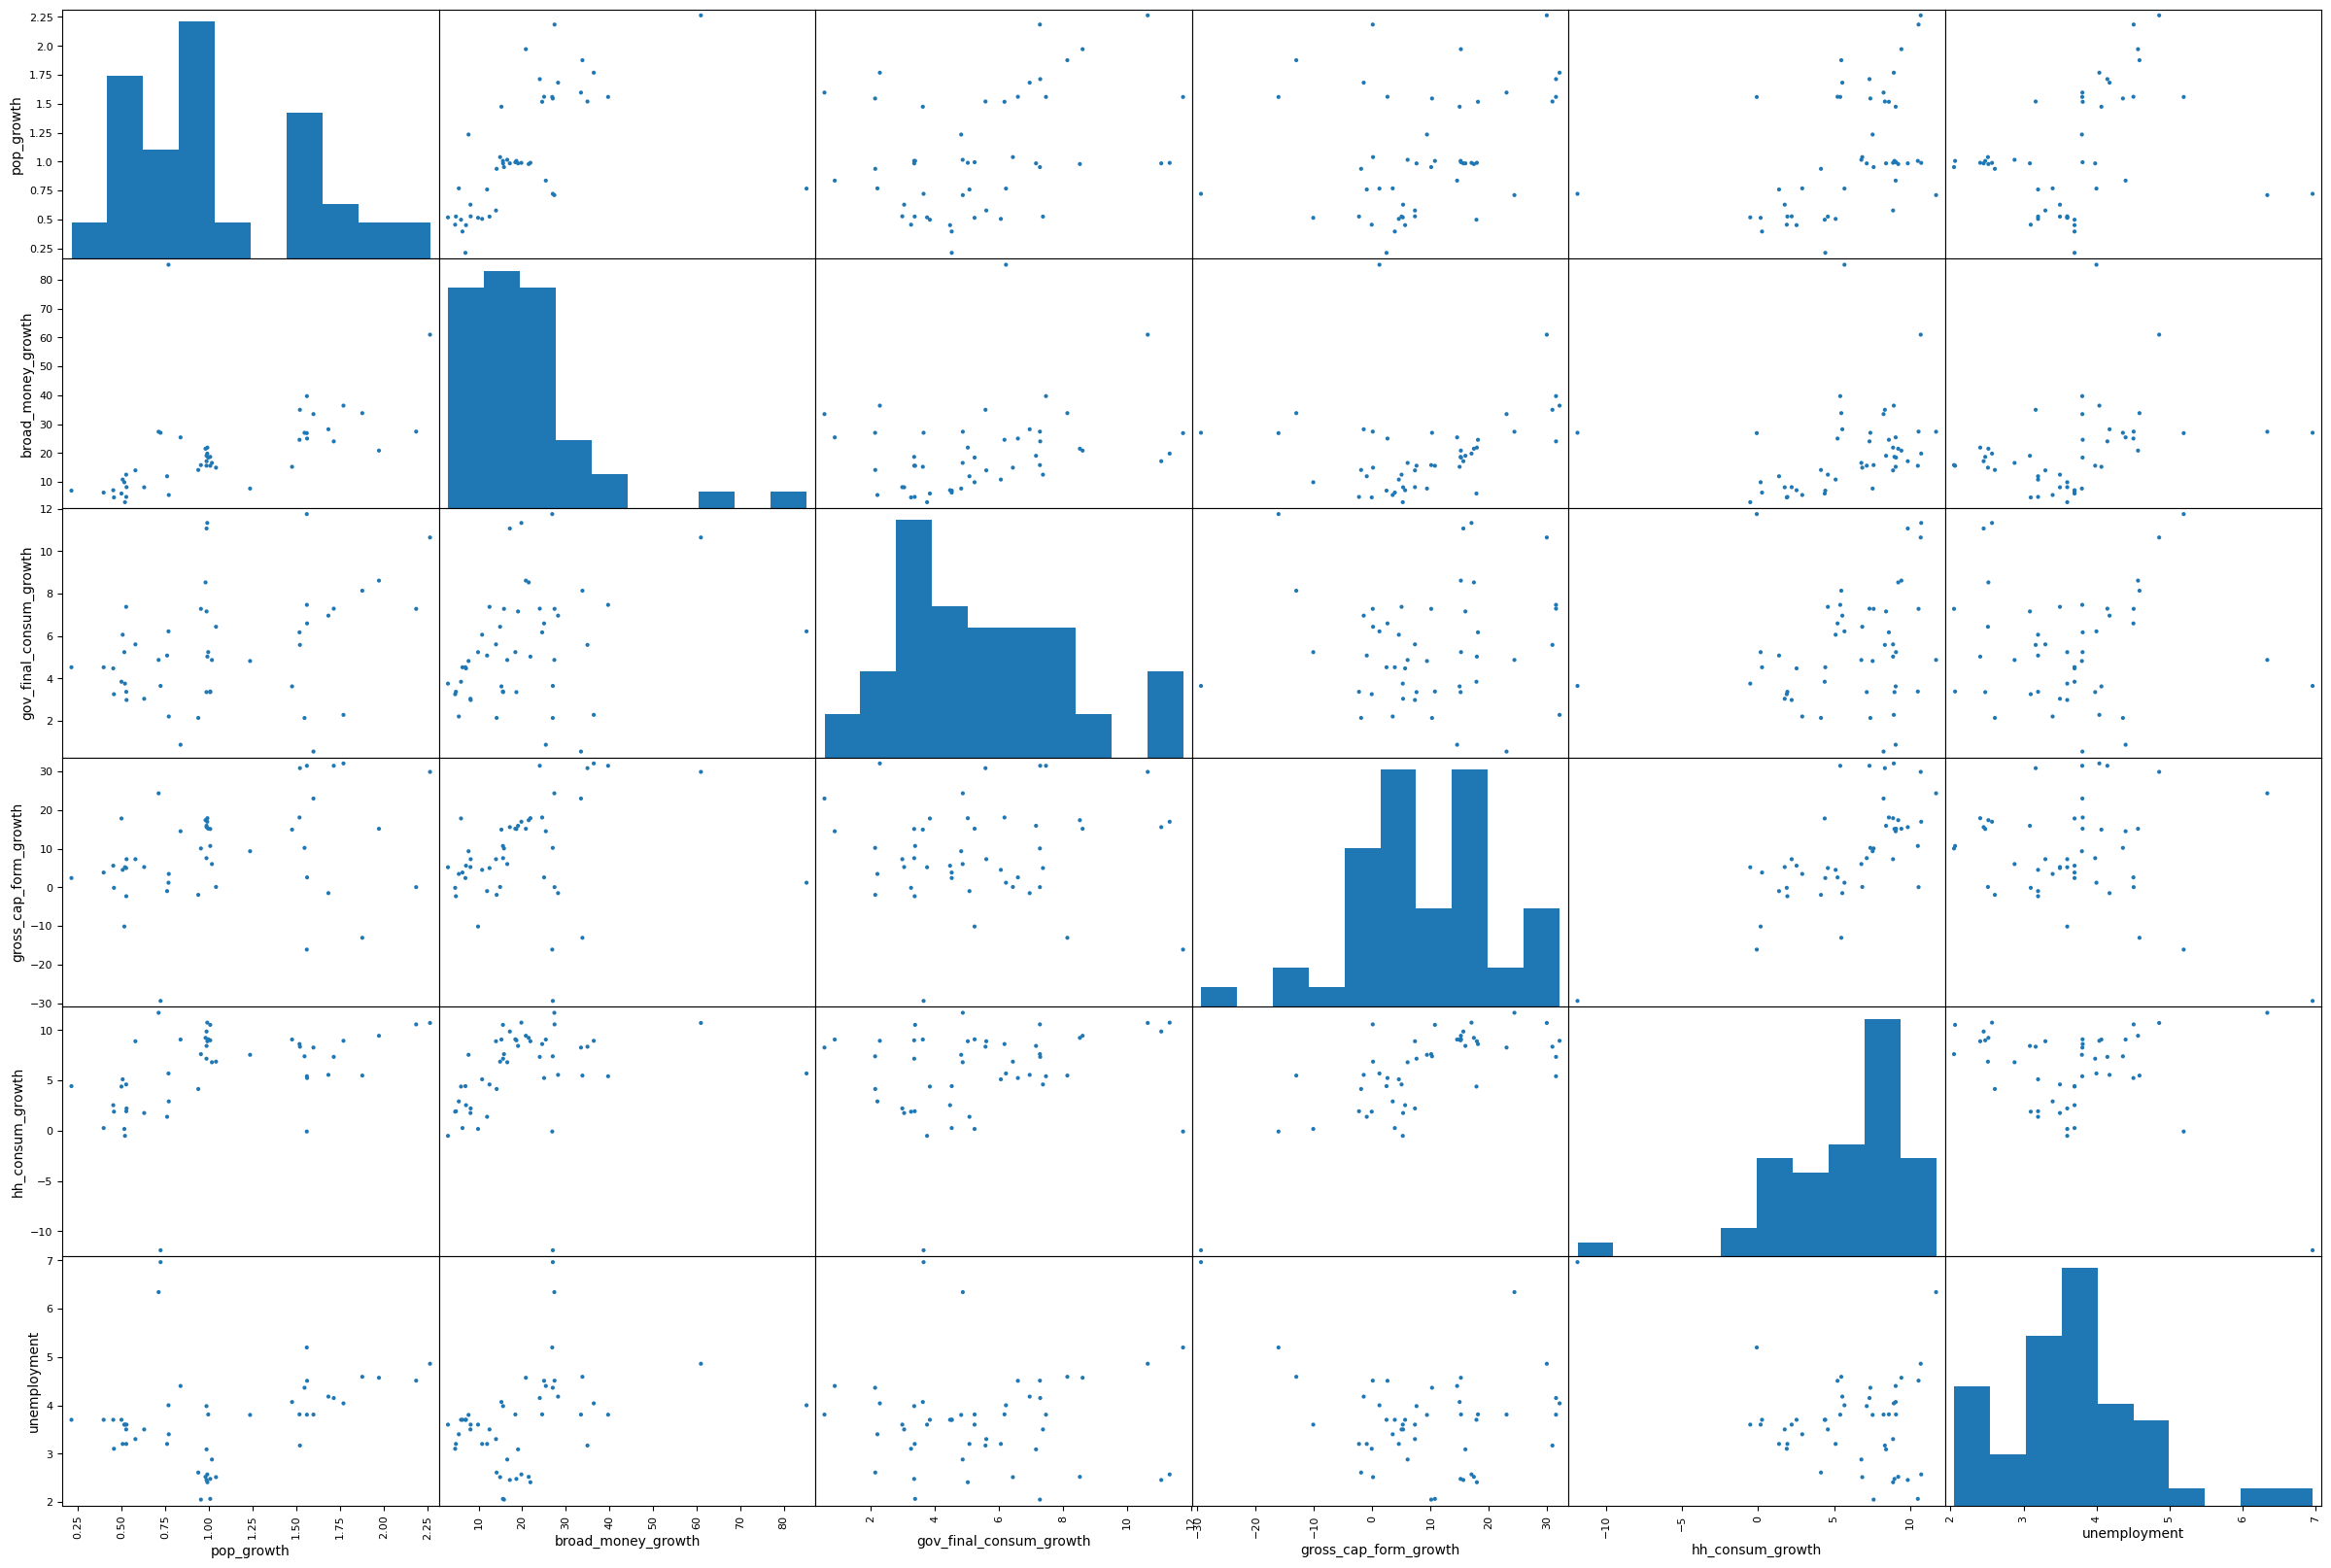

In [ ]:
# define the plot
pd.plotting.scatter_matrix(econ_df_after, alpha = 1, figsize = (30, 20))

# show the plot
plt.show()

***
## Section Four: Describe the Data Set
Before we get to an in-depth exploration of the data or even building the model, we should explore the data a little more and see how the data is distributed and if there are any outliers. I will be adding a few more metrics to the `summary data frame`, sp that it now includes a metric for three standard deviations below and above the mean.

I'll store my information in a new variable called `desc_df`.

In [6]:
# get the summary
desc_df = econ_df.describe()

# add the standard deviation metric
desc_df.loc['+3_std'] = desc_df.loc['mean'] + (desc_df.loc['std'] * 3)
desc_df.loc['-3_std'] = desc_df.loc['mean'] - (desc_df.loc['std'] * 3)

# display it
desc_df

,gdp_growth,gross_capital_formation,pop_growth,birth_rate,broad_money_growth,final_consum_growth,gov_final_consum_growth,gross_cap_form_growth,hh_consum_growth,unemployment
count,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.280315,32.433236,1.058072,16.340896,20.426621,5.820239,5.419214,8.965681,5.879176,3.678096
std,4.209306,4.136932,0.514039,6.814683,14.748442,3.627444,2.622254,12.629912,4.227720,0.968616
min,-5.471219,21.404761,0.211998,7.900000,2.980690,-9.288825,0.560957,-29.403255,-11.894309,2.048000
25%,4.374899,29.776910,0.615602,9.950000,10.586461,3.591334,3.384407,2.114078,3.825773,3.150475
50%,7.513471,32.335229,0.985132,15.150000,17.807598,6.531163,5.056509,7.431966,6.999971,3.700000
75%,10.376191,34.474874,1.525765,21.750000,26.923837,8.179037,7.188470,16.210283,8.938837,4.088500
max,14.827554,41.374062,2.263434,31.200000,85.203081,10.834413,11.742807,32.098276,11.711835,6.963000
+3_std,19.908232,44.844034,2.600188,36.784945,64.671947,16.702571,13.285976,46.855416,18.562336,6.583944
-3_std,-5.347602,20.022439,-0.484044,-4.103153,-23.818705,-5.062092,-2.447547,-28.924054,-6.803985,0.772247


***
One thing that I want to mention is that we have only 50 observations, but 6 (minus the 3 we dropped) exploratory variables. Many people would argue that we need more data to have this many exploratory variables and to be honest, they are correct. **Generally we should aim for at least 20 instances for each variable; however, some argue only 10 would do.** Regardless, we will see at the end of our model that we only end up with 4 exploratory variables so that we will satisfy that rule.

Looking at the data frame up above, a few values are standing out, for example, the maximum value in the `broad_money_growth` column is almost four standard deviations above the mean. Such an enormous value would qualify as an outlier.

### Filtering the Dataset
To drop or not to drop, that is the question. Generally, if we believe the data has been entered in error, we should remove it. However, in this situation, the values that are being identified as outliers are correct values and are not errors. Both of these values were produced during specific moments in time. The one in 1998 was right after the Asian Financial Crisis, and the one in 2001 is right after the DotCom Bubble, so it's entirely conceivable that these values were produced in extreme albeit rare conditions. **For this reason, I will NOT be removing these values from the dataset as they recognize actual values that took place.**

Imagine if we wanted to remove the values that have an amount exceeding three standard deviations. How would we approach this? Well, if we leverage the `numpy` module and the `scipy` module we can filter out the rows using the `stats.zscore`  function. The Z-score is the number of standard deviations from the mean a data point is, so if it's less than 3 we keep it otherwise we drop it. From here, I also provided a way to let us know what rows were removed by using the `index.difference` the function which will show the difference between the two datasets.

In [7]:
# filter the data frame to remove the values exceeding 3 standard deviations
econ_remove_df = econ_df[(np.abs(stats.zscore(econ_df)) < 3).all(axis=1)]

# what rows were removed
econ_df.index.difference(econ_remove_df.index)

Int64Index([1998, 2001], dtype='int64', name='Year')

***
## Section Five: Build the Model
Okay, now that we've loaded, cleaned, and explored the data we can proceed to the next part, building the model. The first thing we need to do is, define our exploratory variables and our explanatory variable. From here, let's split the data into a training and testing set; a healthy ratio is 20% testing and 80% training but a 30% 70% split is also ok.

After splitting the data, we will create an instance of the linear regression model and pass through the `X_train` and `y_train` variables using the `fit()` function.

In [8]:
# define our input variable (X) & output variable
econ_df_after = econ_df.drop(['birth_rate', 'final_consum_growth','gross_capital_formation'], axis = 1)

X = econ_df_after.drop('gdp_growth', axis = 1)
Y = econ_df_after[['gdp_growth']]

# Split X and y into X_
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=1)

# create a Linear Regression model object
regression_model = LinearRegression()

# pass through the X_train & y_train data set
regression_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
X

,pop_growth,broad_money_growth,gov_final_consum_growth,gross_cap_form_growth,hh_consum_growth,unemployment
Year,,,,,,
1969,2.263434,60.984733,10.640799,29.908118,10.700325,4.8600
1970,2.184174,27.422864,7.279573,0.058667,10.557300,4.5100
1971,1.971324,20.844481,8.610547,15.172870,9.426969,4.5700
1972,1.875999,33.815028,8.134824,-13.056701,5.471355,4.5900
1973,1.768293,36.415629,2.287729,32.098276,8.927295,4.0400
1974,1.712705,24.036652,7.288576,31.493083,7.328337,4.1500
1975,1.682000,28.231630,6.960465,-1.493720,5.539527,4.1800
1976,1.596559,33.484656,0.560957,23.006080,8.254930,3.8076
1977,1.559039,39.705763,7.468013,31.486450,5.401645,3.8057


***
### Exploring the Output
With the data now fitted to the model, we can explore the output. The first thing we should do is look at the intercept of the model, and then we will print out each of the coefficients of the model. I print everything out using a loop to make it more efficient.

In [9]:
# let's grab the coefficient of our model and the intercept
intercept = regression_model.intercept_[0]
coefficent = regression_model.coef_[0][0]

print("The intercept for our model is {:.4}".format(intercept))
print('-'*100)

# loop through the dictionary and print the data
for coef in zip(X.columns, regression_model.coef_[0]):
    print("The Coefficient for {} is {:.2}".format(coef[0],coef[1]))

The intercept for our model is 2.08
----------------------------------------------------------------------------------------------------
The Coefficient for pop_growth is 2.0
The Coefficient for broad_money_growth is -0.0017
The Coefficient for gov_final_consum_growth is -0.21
The Coefficient for gross_cap_form_growth is 0.14
The Coefficient for hh_consum_growth is 0.51
The Coefficient for unemployment is 0.027


**The intercept term is the value of the dependent variable when all the independent variables are equal to zero. For each slope coefficient, it is the estimated change in the dependent variable for a one unit change in that particular independent variable, holding the other independent variables constant.**

For example, if all the independent variables were equal to zero, then the `gdp_growth` would be 2.08%. If we looked at the `gross_cap_form_growth` while *holding all the other independent variables constant*, then we would say for a 1 unit increase in `gross_cap_form_growth` would lead to a 0.14% increase in GDP growth.

***
We can also now make predictions with our newly trained model. The process is simple; we call the `predict` method and then pass through some values. In this case, we have some values predefined with the `x_test` variable so we will pass that through. Once we do that, we can select the predictions by slicing the array.

In [10]:
# Get multiple predictions
y_predict = regression_model.predict(X_test)

# Show the first 5 predictions
y_predict[:5]

array([[ 7.61317534],
       [ 6.31344066],
       [ 5.06818662],
       [ 4.19869856],
       [11.11885324]])

In [ ]:
X_test

,pop_growth,broad_money_growth,gov_final_consum_growth,gross_cap_form_growth,hh_consum_growth,unemployment
Year,,,,,,
2002,0.577957,13.999891,5.607038,7.297822,8.880712,3.300
1992,1.039161,14.941525,6.436623,0.106136,6.853033,2.513
2007,0.505234,10.819965,6.061820,4.531682,5.098033,3.200
2005,0.211998,6.989059,4.529687,2.417118,4.419130,3.700
1971,1.971324,20.844481,8.610547,15.172870,9.426969,4.570
1972,1.875999,33.815028,8.134824,-13.056701,5.471355,4.590
2000,0.836181,25.425775,0.881293,14.527854,9.051336,4.400
1995,1.006201,15.593184,3.387772,10.722656,10.511082,2.063
2013,0.455219,4.638891,3.261377,-0.118665,1.882099,3.100


In [ ]:
econ_df_after

,gdp_growth,pop_growth,broad_money_growth,gov_final_consum_growth,gross_cap_form_growth,hh_consum_growth,unemployment
Year,,,,,,,
1969,14.541235,2.263434,60.984733,10.640799,29.908118,10.700325,4.8600
1970,9.997407,2.184174,27.422864,7.279573,0.058667,10.557300,4.5100
1971,10.454693,1.971324,20.844481,8.610547,15.172870,9.426969,4.5700
1972,7.150715,1.875999,33.815028,8.134824,-13.056701,5.471355,4.5900
1973,14.827554,1.768293,36.415629,2.287729,32.098276,8.927295,4.0400
1974,9.460873,1.712705,24.036652,7.288576,31.493083,7.328337,4.1500
1975,7.863512,1.682000,28.231630,6.960465,-1.493720,5.539527,4.1800
1976,13.115159,1.596559,33.484656,0.560957,23.006080,8.254930,3.8076
1977,12.277661,1.559039,39.705763,7.468013,31.486450,5.401645,3.8057


### Measures of Error

We can examine how well our data fit the model, so we will take `y_predictions` and compare them to our `y_actuals` these will be our residuals. From here we can calculate a few metrics to help quantify how well our model fits the data. Here are a few popular metrics:

- **Mean Absolute Error (MAE):** Is the mean of the absolute value of the errors. This gives an idea of magnitude but no sense of direction (too high or too low).

- **Mean Squared Error (MSE):** Is the mean of the squared errors. MSE is more popular than MAE because MSE "punishes" more significant errors.

- **Root Mean Squared Error (RMSE):** Is the square root of the mean of the squared errors. RMSE is even more favored because it allows us to interpret the output in y-units.

Luckily for us, `sklearn` and `statsmodel` both contain functions that will calculate these metrics for us. The examples below were calculated using the `sklearn` library and the `math` library.

In [13]:
import math
# calculate the mean squared error
model_mse = mean_squared_error(y_test, y_predict)

# calculate the mean absolute error
model_mae = mean_absolute_error(y_test, y_predict)

# calulcate the root mean squared error
model_rmse =  math.sqrt(model_mse)

# display the output
print("MSE {:.3}".format(model_mse))
print("MAE {:.3}".format(model_mae))
print("RMSE {:.3}".format(model_rmse))

MSE 0.707
MAE 0.611
RMSE 0.841
